# Classification

## Exploratory Data Analysis

### Warm up: Iris dataset

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
iris = datasets.load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [2]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [4]:
iris.data.shape

(150, 4)

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


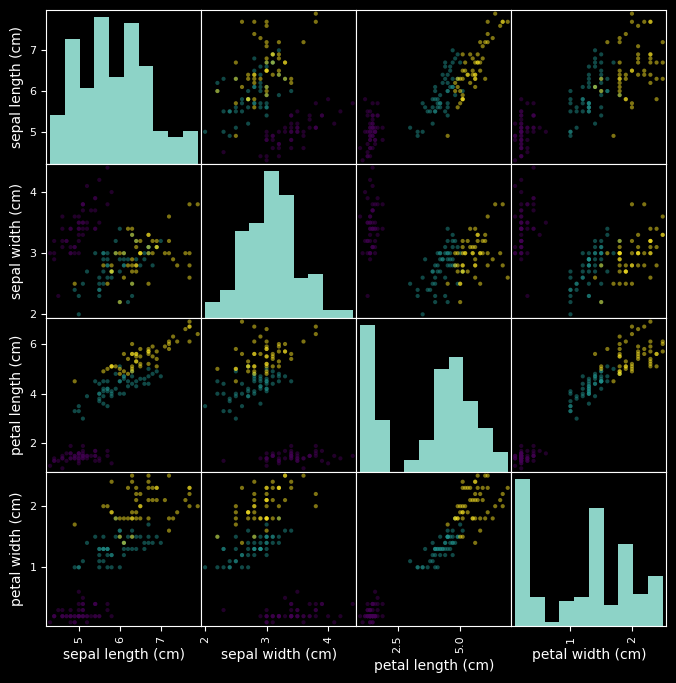

In [7]:
pd.plotting.scatter_matrix(df, c=y, figsize=[8,8])#, s=150, marker='D')
plt.show()

### Numerical EDA
In this chapter, you'll be working with a dataset obtained from the UCI Machine Learning Repository consisting of votes made by US House of Representatives Congressmen. Your goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues. Here, it's worth noting that we have preprocessed this dataset to deal with missing values. This is so that your focus can be directed towards understanding how to train and evaluate supervised learning models. Once you have mastered these fundamentals, you will be introduced to preprocessing techniques in Chapter 4 and have the chance to apply them there yourself - including on this very same dataset!

Before thinking about what supervised learning models you can apply to this, however, you need to perform Exploratory data analysis (EDA) in order to understand the structure of the data.

Attribute Information:
1. Class Name: 2 (democrat, republican)
2. handicapped-infants: 2 (y,n)
3. water-project-cost-sharing: 2 (y,n)
4. adoption-of-the-budget-resolution: 2 (y,n)
5. physician-fee-freeze: 2 (y,n)
6. el-salvador-aid: 2 (y,n)
7. religious-groups-in-schools: 2 (y,n)
8. anti-satellite-test-ban: 2 (y,n)
9. aid-to-nicaraguan-contras: 2 (y,n)
10. mx-missile: 2 (y,n)
11. immigration: 2 (y,n)
12. synfuels-corporation-cutback: 2 (y,n)
13. education-spending: 2 (y,n)
14. superfund-right-to-sue: 2 (y,n)
15. crime: 2 (y,n)
16. duty-free-exports: 2 (y,n)
17. export-administration-act-south-africa: 2 (y,n)

Loading and converting data

In [8]:
colNames = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
            'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
            'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
df = pd.read_csv('house-votes-84.zip',
                 header=None,
                 na_values=['?'],
                 true_values=['y'],
                 false_values=['n'],
                 names = colNames)
dtypes = dict(zip(colNames, ['str'] + ['float']*16))
df = df.astype(dtypes)

Group mean imputation

In [9]:
#df.iloc[:,1:] = df.groupby("party").transform(lambda x: x.fillna((x.mean()>=0.5)*1))
df = df.fillna((df.groupby('party').transform('mean')>=0.5)*1)
dtypes = dict(zip(colNames, ['str'] + ['int64']*16))
df = df.astype(dtypes)
df.info()
df.iloc[:,1:].sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              435 non-null    object
 1   infants            435 non-null    int64 
 2   water              435 non-null    int64 
 3   budget             435 non-null    int64 
 4   physician          435 non-null    int64 
 5   salvador           435 non-null    int64 
 6   religious          435 non-null    int64 
 7   satellite          435 non-null    int64 
 8   aid                435 non-null    int64 
 9   missile            435 non-null    int64 
 10  immigration        435 non-null    int64 
 11  synfuels           435 non-null    int64 
 12  education          435 non-null    int64 
 13  superfund          435 non-null    int64 
 14  crime              435 non-null    int64 
 15  duty_free_exports  435 non-null    int64 
 16  eaa_rsa            435 non-null    int64 
dt

3689

In [10]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [11]:
df.describe()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.450575,0.558621,0.597701,0.413793,0.494253,0.629885,0.567816,0.565517,0.519540,0.503448,0.372414,0.422989,0.503448,0.586207,0.436782,0.857471
std,0.498124,0.497123,0.490926,0.493079,0.500543,0.483391,0.495950,0.496260,0.500193,0.500564,0.484004,0.494602,0.500564,0.493079,0.496558,0.349994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.groupby('party').mean()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
party,,,,,,,,,,,,,,,,
democrat,0.617978,0.554307,0.891386,0.052434,0.205993,0.460674,0.779026,0.831461,0.775281,0.464419,0.52809,0.134831,0.273408,0.337079,0.659176,0.955056
republican,0.184524,0.565476,0.130952,0.988095,0.952381,0.898810,0.232143,0.142857,0.113095,0.565476,0.12500,0.880952,0.869048,0.982143,0.083333,0.702381


### Visual EDA
The Numerical EDA you did in the previous exercise gave you some very important information, such as the names and data types of the columns, and the dimensions of the DataFrame. Following this with some visual EDA will give you an even better understanding of the data. However, you may have noticed in the previous exercise that all the features in this dataset are binary; that is, they are either 0 or 1. So a different type of plot would be more useful here, such as Seaborn's `countplot`.

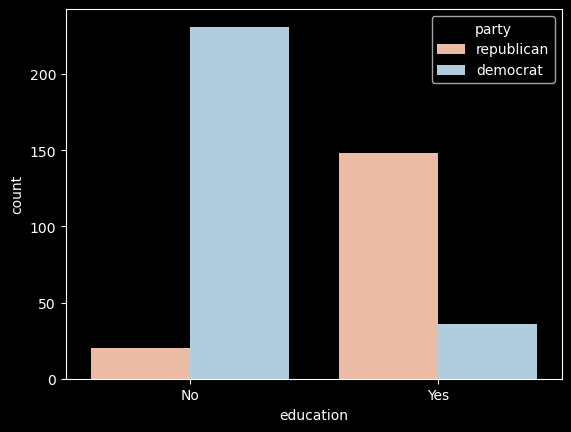

In [13]:
import seaborn as sns
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

So the resulting plot shows the difference in voting behavior between the two parties for the `'education'` bill, with each party colored differently. We manually specified the color to be `'RdBu'`, as the Republican party has been traditionally associated with red, and the Democratic party with blue.

It seems like Democrats voted resoundingly against this bill, compared to Republicans. This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. An expert in U.S politics may be able to predict this without machine learning, but probably not instantaneously - and certainly not if we are dealing with hundreds of samples!

In the IPython Shell, explore the voting behavior further by generating countplots for the `'satellite'` and `'missile'` bills, and answer the following question: Of these two bills, for which ones do Democrats vote resoundingly in favor of, compared to Republicans?

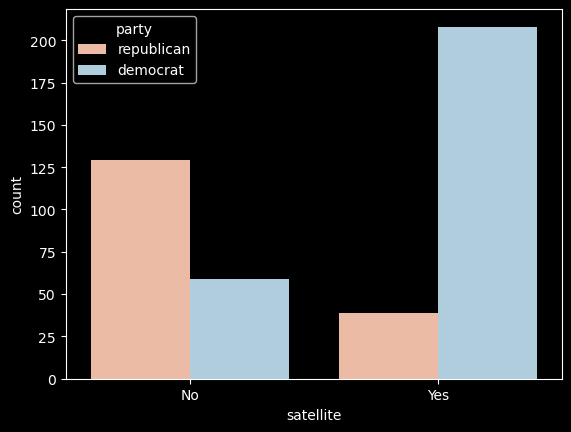

In [14]:
sns.countplot(x='satellite', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

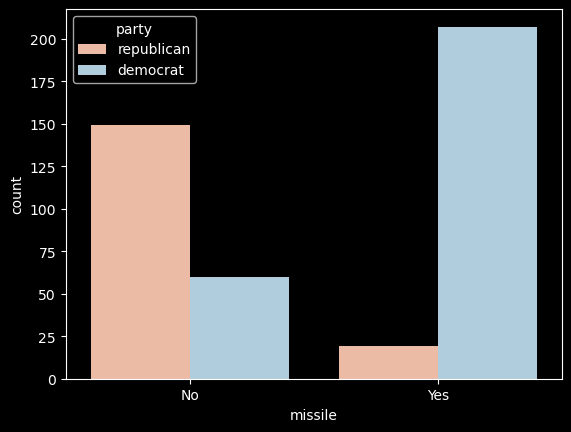

In [15]:
sns.countplot(x='missile', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

Democrats voted in favor of both `'satellite'` and `'missile'`

## k-Nearest Neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(n_neighbors=6)

### k-Nearest Neighbors: Fit
Having explored the Congressional voting records dataset, it is time now to build your first classifier. In this exercise, you will fit a k-Nearest Neighbors classifier to the voting dataset, which has once again been pre-loaded for you into a DataFrame df.

It was discussed the importance of ensuring your data adheres to the format required by the scikit-learn API. The features need to be in an array where each column is a feature and each row a different observation or data point - in this case, a Congressman's voting record. The target needs to be a single column with the same number of observations as the feature data. We have done this for you in this exercise. Notice we named the feature array X and response variable y: This is in accordance with the common scikit-learn practice.

Your job is to create an instance of a k-NN classifier with 6 neighbors (by specifying the n_neighbors parameter) and then fit it to the data.

In [17]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values
X.shape

(435, 16)

In [18]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

### k-Nearest Neighbors: Predict
Having fit a k-NN classifier, you can now use it to predict the label of a new data point. However, there is no unlabeled data available since all of it was used to fit the model! You can still use the .predict() method on the X that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, unseen data.

For now, a random unlabeled data point has been generated and is available to you as X_new. You will use your classifier to predict the label for this new data point, as well as on the training data X that the model has already seen. Using .predict() on X_new will generate 1 prediction, while using it on X will generate 435 predictions: 1 for each sample.

Now that your k-NN classifier with 6 neighbors has been fit to the data, it can be used to predict the labels of new data points.

In [19]:
# Random new data point
X_new = pd.DataFrame([np.random.random(size=16)], columns=df.columns[1:]).values
print('Random new data point:\n', X_new)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Random new data point:
 [[0.99799269 0.34143972 0.31930408 0.81911788 0.18592006 0.85440309
  0.93860214 0.04072552 0.5969417  0.67146711 0.99070397 0.36989696
  0.78841322 0.24061883 0.33279802 0.03486003]]
Prediction: ['republican']


Did your model predict 'democrat' or 'republican'? How sure can you be of its predictions? In other words, how can you measure its performance?

### Measuring model performance

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

Accuracy

In [21]:
knn.score(X_test, y_test)

0.9541984732824428

### Model complexity curve

* Larger k = smoother decision boundary = less complex model
* Smaller k = more complex model = can lead to overfi"ing

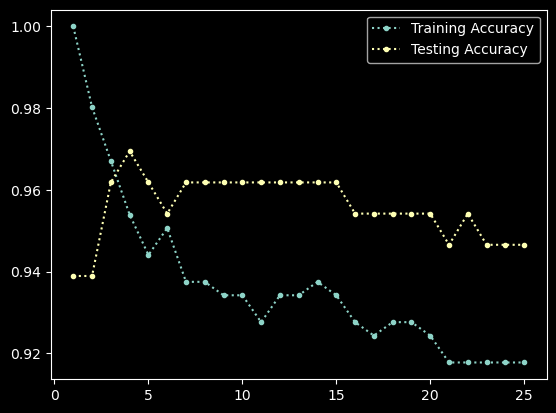

In [22]:
n_neighbors = np.arange(1, 26)

train_acc = [KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).score(X_train, y_train) for k in n_neighbors]
plt.plot(n_neighbors, train_acc, marker='.', linestyle=':')

test_acc = [KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).score(X_test, y_test) for k in n_neighbors]
plt.plot(n_neighbors, test_acc, marker='.', linestyle=':')

plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.show()

### The digits recognition dataset
Up until now, you have been performing binary classification, since the target variable had two possible outcomes. To perform multi-class classification, where the target variable could take on three possible outcomes, the following exercises will be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images, as you'll see in this exercise (for more on plotting 2D arrays, see Chapter 2 of DataCamp's course on Data Visualization with Python). On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

In [23]:
# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [24]:
digits.data.shape

(1797, 64)

In [25]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [26]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [27]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
digits.images.shape

(1797, 8, 8)

In [29]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [30]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

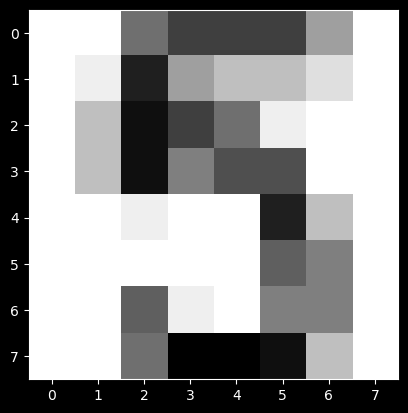

In [31]:
# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

It looks like the image in question corresponds to the digit '5'. Now, can you build a classifier that can make this prediction not only for this image, but for all the other ones in the dataset?

### Train/Test Split + Fit/Predict/Accuracy
Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset! After creating arrays for the features and target variable, you will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the .score() method.

In [32]:
# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test,y_test))

0.9833333333333333


Incredibly, this out of the box k-NN classifier with 7 neighbors has learned from the training data and predicted the labels of the images in the test set with 98% accuracy, and it did so in less than a second! This is one illustration of how incredibly useful machine learning techniques can be.

### Overfitting and underfitting
Remember the model complexity curve that Hugo showed in the video? You will now construct such a curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

The training and testing sets are available to you in the workspace as X_train, X_test, y_train, y_test. In addition, KNeighborsClassifier has been imported from sklearn.neighbors.

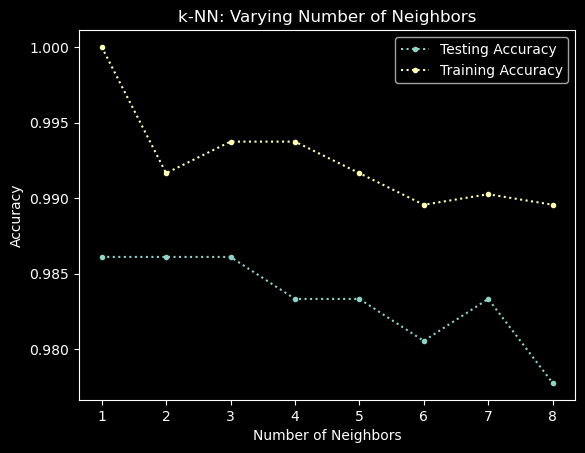

In [33]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy', marker='.', linestyle=':')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy', marker='.', linestyle=':')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

 It looks like the test accuracy is highest when using 1 to 3 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data. Now that you've grasped the fundamentals of classification, you will learn about regression in the next chapter!

# Regression

## Boston housing data

In [34]:
df = pd.read_csv('boston.zip')
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Target: MEDV - Median value of owner-occupied homes in $1000's

In [35]:
#Creating feature and target arrays
y = df['MEDV'].values
X = df.drop('MEDV', axis=1).values

Choosing a single feature for predicting house value

In [36]:
X_rooms = X[:, 5]
X_rooms = X_rooms.reshape(-1, 1)
y = y.reshape(-1,1)

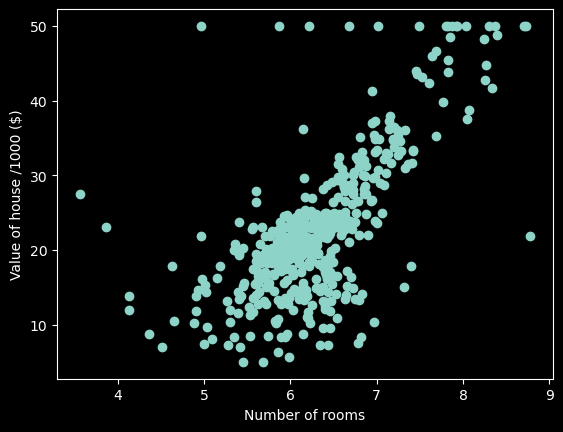

In [37]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

Fitting a regression model

In [38]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_rooms, y)

LinearRegression()

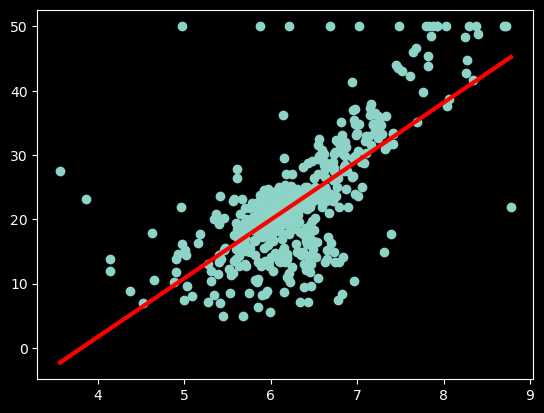

In [39]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)
plt.scatter(X_rooms, y)
plt.plot(prediction_space, reg.predict(prediction_space), color='red', linewidth=3)
plt.show()

## Importing data for supervised learning
In this chapter, you will work with Gapminder data that we have consolidated into one CSV file available in the workspace as 'gapminder.csv'. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. As in Chapter 1, the dataset has been preprocessed.

Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.

Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's .reshape() method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice.

In [40]:
df = pd.read_csv('gm_2008_region.zip')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...,...
134,3350832.0,2.11,0.5,2.489764,26.39123,15317.0,124.2604,76.0,13.0,America
135,26952719.0,2.46,0.1,4.476669,25.32054,3733.0,124.3462,68.7,49.2,Europe & Central Asia
136,86589342.0,1.86,0.4,1.479347,20.91630,4085.0,121.9367,75.4,26.2,East Asia & Pacific
137,13114579.0,5.88,13.6,0.148982,20.68321,3039.0,132.4493,52.0,94.9,Sub-Saharan Africa


In [41]:
y = df.life.values
X = df.fertility.values

print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

y = y.reshape(-1,1)
X = X.reshape(-1,1)

print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


Notice the differences in shape before and after applying the .reshape() method. Getting the feature and target variable arrays into the right format for scikit-learn is an important precursor to model building.

## Exploring the Gapminder data
As always, it is important to explore your data before building models. On the right, we have constructed a heatmap showing the correlation between the different features of the Gapminder dataset, which has been pre-loaded into a DataFrame as df and is available for exploration in the IPython Shell. Cells that are in green show positive correlation, while cells that are in red show negative correlation. Take a moment to explore this: Which features are positively correlated with life, and which ones are negatively correlated? Does this match your intuition?

Then, in the IPython Shell, explore the DataFrame using pandas methods such as .info(), .describe(), .head().

In case you are curious, the heatmap was generated using Seaborn's heatmap function and the following line of code, where df.corr() computes the pairwise correlation between columns:

`sns.heatmap(df.corr(), square=True, cmap='RdYlGn')`

Once you have a feel for the data, consider the statements below and select the one that is not true.

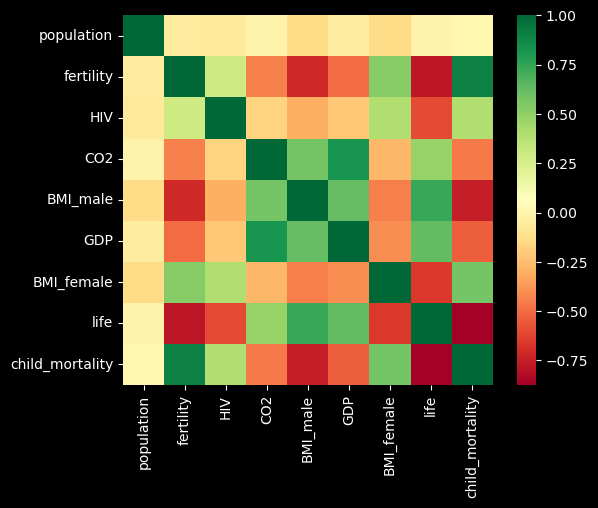

In [42]:
sns.heatmap(df.corr(numeric_only=True), square=True, cmap='RdYlGn')
plt.show()

In [43]:
df.corr(numeric_only=True)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000


## Fit & predict for regression
Now, you will fit a linear regression and predict life expectancy using just one feature. You saw Andy do this earlier using the 'RM' feature of the Boston housing dataset. In this exercise, you will use the 'fertility' feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is 'life'. The array for the target variable has been pre-loaded as y and the array for 'fertility' has been pre-loaded as X_fertility.

A scatter plot with 'fertility' on the x-axis and 'life' on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the R2 score using sckit-learn's .score() method.

R^2 0.6192442167740035


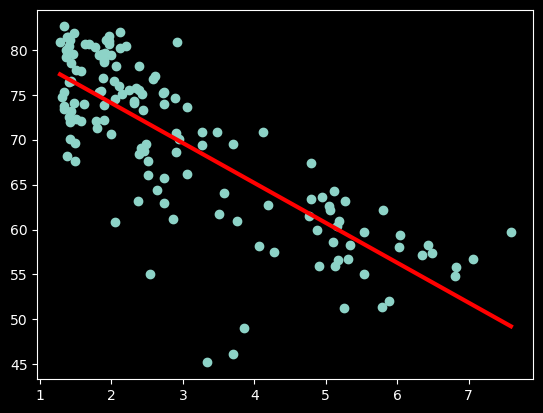

In [44]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X, y)
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)
y_pred = reg.predict(prediction_space)

print('R^2', reg.score(X, y))

plt.scatter(X,y)
plt.plot(prediction_space, y_pred, color='red', linewidth=3)
plt.show()

Notice how the line captures the underlying trend in the data. And the performance is quite decent for this basic regression model with only one feature!

## Train/test split for regression
As you learned in Chapter 1, train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.

In this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the R2 score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. The feature array X and target variable array y have been pre-loaded for you from the DataFrame df.

In [45]:
from sklearn.metrics import mean_squared_error
X = df.drop(columns=['life', 'Region'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8380468731429507
Root Mean Squared Error: 3.2476010800375748


Using all features has improved the model score. This makes sense, as the model has more information to learn from. However, there is one potential pitfall to this process. Can you spot it?

## k-fold cross-validation
Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.

In this exercise, you will practice 5-fold cross validation on the Gapminder data. By default, scikit-learn's cross_val_score() function uses R2 as the metric of choice for regression. Since you are performing 5-fold cross-validation, the function will return 5 scores. Your job is to compute these 5 scores and then take their average.

In [46]:
from sklearn.model_selection import cross_val_score

reg = LinearRegression()
cv_scores = cross_val_score(reg, X, y, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793286


In [47]:
np.percentile(cv_scores, [2.5, 97.5])

array([0.80742647, 0.94067487])

Now that you have cross-validated your model, you can more confidently evaluate its predictions.

## K-Fold CV comparison
Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this exercise, you will explore this for yourself. Your job is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.

In the IPython Shell, you can use %timeit to see how long each 3-fold CV takes compared to 10-fold CV by executing the following cv=3 and cv=10:

`%timeit cross_val_score(reg, X, y, cv = ____)

In [48]:
%timeit cross_val_score(reg, X, y, cv=3)
%timeit cross_val_score(reg, X, y, cv=10)

5.07 ms ± 72.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
16.9 ms ± 36.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [49]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

0.8718712782622156
0.8436128620131239


## Why regularize?
* Recall: Linear regression minimizes a loss function, in this case, OLS loss function
* It chooses a coefficient for each feature variable
* Large coefficients can lead to overfitting
* Penalizing large coefficients: Regularization
* Ridge (L2) regression:
    * Loss function = OLS loss function + $\alpha * \sum_{i=1}^{n} a_i^2$
    * Alpha: parameter we need to choose
    * Hyperparameter tunning
    * Alpha controls model complexity
        * Alpha=0 means coefficients are not penalized and gets back to OLS (can overfit)
        * High alpha means large coefficients are penalized lead to a simpler model (can underfit)
* Lasso (L1) regression:
    * Loss function = OLS los function + $\alpha * \sum_{i=1}^{n} |a_i|$
    * Can be used to select important features of a dataset
    * Tend to shrink the coefficients of less important features to exactly 0
    * The features whose coefficients are not shrunk to zero are 'selected' by the Lasso algorithm

## Regularization I: Lasso
Lasso selected out features as being the most important ones for predictin, while shrinking the coefficients of certain other features to 0. Its ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of features.

In this exercise, you will fit a lasso regression to the Gapminder data you have been working with and plot the coefficients. You will find that the coefficients of some features are shrunk to 0, with only the most important ones remaining.

[-0.         -0.30409556 -2.33203165 -0.          0.51040194  1.45942351
 -1.02516505 -4.57678764]


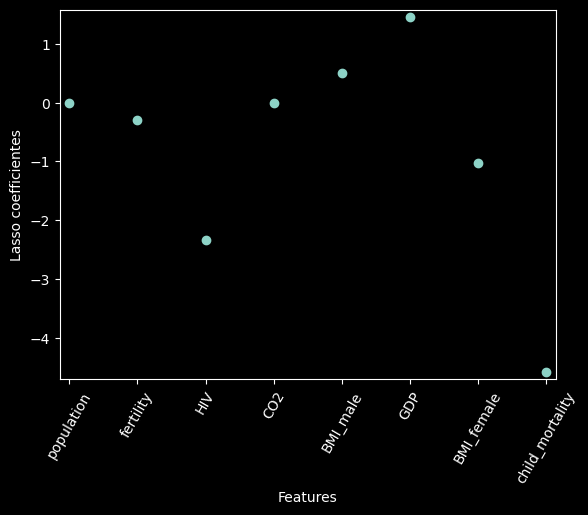

In [50]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale

# Create arrays for the features and the response variable
y = df['life']
columns=df.columns.drop(['life', 'Region'])
X = scale(df.drop(['life', 'Region'], axis=1))

lasso = Lasso(alpha=0.4)

lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)

plt.scatter(range(len(columns)), lasso_coef)
plt.xlabel('Features'); plt.ylabel('Lasso coefficientes')
plt.xticks(range(len(columns)), columns, rotation=60)
plt.margins(0.02)
plt.show()

?: According to the lasso algorithm, it seems like 'child_mortality' is the most important feature when predicting life expectancy.

## Regularization II: Ridge
Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

Recall that Lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1 regularization because the regularization term is the **L1 norm of the coefficients**. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in **Ridge regression - you would be computing the L2 norm**. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated R2 scores for each, using this function that we have defined for you, which plots the R2 score as well as standard error for each alpha:

In [51]:
def display_plot(x, y, std, k, xscale):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(x, y, marker='o')

    sem = std / np.sqrt(k)

    ax.fill_between(x, y + sem, y - sem, alpha=0.2)
    ax.axhline(np.max(y), linestyle='--', color='.5')
    ax.set_xlim([x.min(), x.max()])
    ax.set_xscale(xscale)

Don't worry about the specifics of the above function works. The motivation behind this exercise is for you to see how the $R^2$ score varies with different alphas, and to understand the importance of selecting the right value for alpha. You'll learn how to tune alpha in the next chapter.

In [52]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 10)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge() # normalize=True)

In [53]:
# Compute CV scores over range of alphas at k folds
k=10
for alpha in alpha_space:
    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    # Perform k-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=k)
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

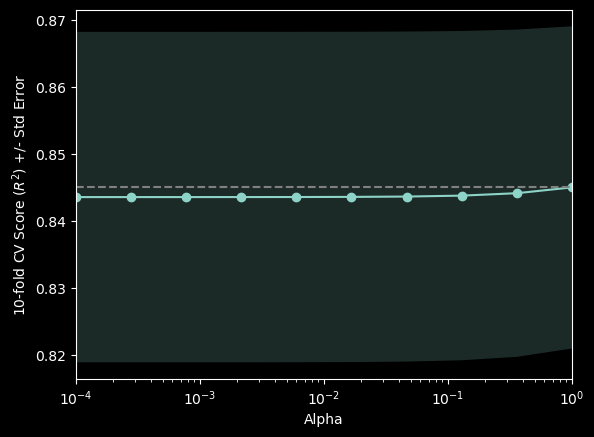

In [54]:
# Display the plot
display_plot(alpha_space, ridge_scores, ridge_scores_std, k, xscale='log')
plt.ylabel('{}-fold CV Score ($R^2$) +/- Std Error'.format(k))
plt.xlabel('Alpha')
plt.show()

 Notice how the cross-validation scores change with different alphas. Which alpha should you pick? How can you fine-tune your model? You'll learn all about this in the next chapter!

# Fine-tuning your model

## Metrics for classification
In Chapter 1, you evaluated the performance of your k-NN classifier based on its accuracy. However, as Andy discussed, accuracy is not always an informative metric. In this exercise, you will dive more deeply into evaluating the performance of binary classifiers by computing a confusion matrix and generating a classification report.

The classification report consisted of three rows, and an additional support column. The support gives the number of samples of the true response that lie in that class, so, the support was the number of each class in the test set on which the classification report was computed. The precision, recall, and f1-score columns, then, gave the respective metrics for that particular class.

Here, you'll work with the PIMA Indians dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes. As in Chapters 1 and 2, the dataset has been preprocessed to deal with missing values.

In [55]:
df=pd.read_csv('diabetes.zip')
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Your job is to train a k-NN classifier to the data and evaluate its performance by generating a confusion matrix and classification report.

In [56]:
# Import necessary modules
from sklearn.metrics import classification_report, confusion_matrix

# Create training and test set
y = df['diabetes'].values
X = scale(df.drop(['diabetes'], axis=1).values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.40, random_state=42, stratify=y)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix:
 [[175  26]
 [ 57  50]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.81       201
           1       0.66      0.47      0.55       107

    accuracy                           0.73       308
   macro avg       0.71      0.67      0.68       308
weighted avg       0.72      0.73      0.72       308



By analyzing the confusion matrix and classification report, you can get a much better understanding of your classifier's performance.

## Building a logistic regression model
Time to build your first logistic regression model! Scikit-learn makes it very easy to try different models, since the Train-Test-Split/Instantiate/Fit/Predict paradigm applies to all classifiers and regressors - which are known in scikit-learn as 'estimators'. You'll see this now for yourself as you train a logistic regression model on exactly the same data as in the previous exercise. Will it outperform k-NN? There's only one way to find out!

In [57]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42, stratify=y)

# Create the classifier: logreg
logreg = LogisticRegression(solver='liblinear', penalty='l2', C=1) #Default L2 regularization with C=1

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[169  32]
 [ 49  58]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       201
           1       0.64      0.54      0.59       107

    accuracy                           0.74       308
   macro avg       0.71      0.69      0.70       308
weighted avg       0.73      0.74      0.73       308



You now know how to use logistic regression for binary classification - great work! Logistic regression is used in a variety of machine learning applications and will become a vital part of your data science toolbox.

## Plotting an ROC curve
Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models. Most classifiers in scikit-learn have a .predict_proba() method which returns the probability of a given sample being in a particular class. Having built a logistic regression model, you'll now evaluate its performance by plotting an ROC curve. In doing so, you'll make use of the .predict_proba() method and become familiar with its functionality.

Here, you'll continue working with the PIMA Indians diabetes dataset. The classifier has already been fit to the training data and is available as logreg

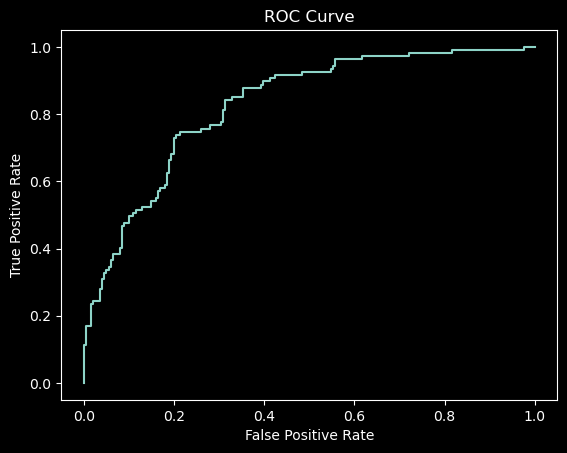

In [58]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## AUC computation
Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5. This is one way in which the AUC, which Hugo discussed in the video, is an informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!

In this exercise, you'll calculate AUC scores using the roc_auc_score() function from sklearn.metrics as well as by performing cross-validation on the diabetes dataset.

In [59]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.82680057655647
AUC scores computed using 5-fold cross-validation: [0.81240741 0.80944444 0.82537037 0.87339623 0.84358491]


You now have a number of different methods you can use to evaluate your model's performance.

## Hyperparameter tuning with GridSearchCV
It's demonstrated how to tune the n_neighbors parameter of the KNeighborsClassifier() using GridSearchCV on the voting dataset. You will now practice this yourself, but by using logistic regression on the diabetes dataset instead!

Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: C. C controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large C can lead to an overfit model, while a small C can lead to an underfit model.

The hyperparameter space for C has been setup for you. Your job is to use GridSearchCV and logistic regression to find the optimal C in this hyperparameter space. The feature array is available as X and target variable array is available as y.

You may be wondering why you aren't asked to split the data into training and test sets. Good observation! Here, we want you to focus on the process of setting up the hyperparameter grid and performing grid-search cross-validation. In practice, you will indeed want to hold out a portion of your data for evaluation purposes, and you will learn all about this in the next section!

In [60]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(solver='liblinear')

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.7708853238265002


## Hyperparameter tuning with RandomizedSearchCV
GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. You'll practice using RandomizedSearchCV in this exercise and see how this works.

Here, you'll also be introduced to a new model: the Decision Tree. Don't worry about the specifics of how this model works. Just like k-NN, linear regression, and logistic regression, decision trees in scikit-learn have .fit() and .predict() methods that you can use in exactly the same way as before. Decision trees have many parameters that can be tuned, such as max_features, max_depth, and min_samples_leaf: This makes it an ideal use case for RandomizedSearchCV.

In [61]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 8}
Best score is 0.7357270180799592


You'll see a lot more of decision trees and `RandomizedSearchCV` as you continue your machine learning journey. Note that `RandomizedSearchCV` will never outperform `GridSearchCV`. Instead, it is valuable because it saves on computation time.

## Hold-out set in practice I: Classification
You will now practice evaluating a model with tuned hyperparameters on a hold-out set. The feature array and target variable array from the diabetes dataset have been pre-loaded as X and y.

In addition to C, logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' regularization. Your job in this exercise is to create a hold-out set, tune the 'C' and 'penalty' hyperparameters of a logistic regression classifier using GridSearchCV on the training set.

In [62]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression(solver='liblinear')

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.05179474679231213, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7847826086956522


## Hold-out set in practice II: Regression

Remember lasso and ridge regression from the previous chapter? Lasso used the $L1$ penalty to regularize, while ridge used the $L2$ penalty. There is another type of regularized regression known as the **elastic net**. In elastic net regularization, the penalty term is a linear combination of the $L1$ and $L2$ penalties:

$$a∗L1+b∗L2$$
In scikit-learn, this term is represented by the `'l1_ratio'` parameter: An `'l1_ratio'` of 1 corresponds to an $L1$ penalty, and anything lower is a combination of $L1$ and $L2$.

In this exercise, you will `GridSearchCV` to tune the `'l1_ratio'` of an elastic net model trained on the Gapminder data. As in the previous exercise, use a hold-out set to evaluate your model's performance.

In [63]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

/home/mauricio/miniconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.432e+01, tolerance: 8.437e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/mauricio/miniconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.396e+01, tolerance: 8.286e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one o

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'l1_ratio': array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ])})

In [64]:
# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.22565071530718728
Tuned ElasticNet MSE: 0.17151529737271654


Now that you understand how to fine-tune your models, it's time to learn about preprocessing techniques and how to piece together all the different stages of the machine learning process into a pipeline!

# Preprocessing and pipelines

## Exploring categorical features
The Gapminder dataset that you worked with in previous chapters also contained a categorical 'Region' feature, which we dropped in previous exercises since you did not have the tools to deal with it. Now however, you do, so we have added it back in!

Your job in this exercise is to explore this feature. Boxplots are particularly useful for visualizing categorical features such as this.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


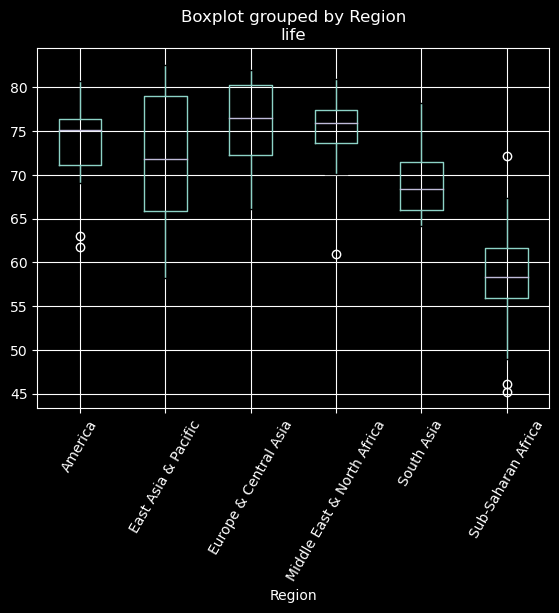

In [66]:
import pandas as pd
df = pd.read_csv('gm_2008_region.zip')
df.boxplot('life', 'Region', rot=60)
plt.show()

Exploratory data analysis should always be the precursor to model building.

## Creating dummy variables
Scikit-learn does not accept non-numerical features. You saw in the previous exercise that the 'Region' feature contains very useful information that can predict life expectancy. For example, Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia. Therefore, if you are trying to predict life expectancy, it would be preferable to retain the 'Region' feature. To do this, you need to binarize it by creating dummy variables, which is what you will do in this exercise.

In [84]:
df_region = pd.get_dummies(df)
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


Now that you have created the dummy variables, you can use the 'Region' feature to predict life expectancy!

## Regression with categorical features
Having created the dummy variables from the 'Region' feature, you can build regression models as you did before. Here, you'll use ridge regression to perform 5-fold cross-validation.

In [89]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
ridge = Ridge(alpha=0.5)#, normalize=True)
ridge_cv = cross_val_score(ridge, scale(X), y, cv=5)
print(ridge_cv)

[0.81904565 0.82963822 0.90258821 0.80643618 0.94406007]


## Dropping missing data
The voting dataset from Chapter 1 contained a bunch of missing values that we dealt with for you behind the scenes. Now, it's time for you to take care of these yourself!

The unprocessed dataset has been loaded into a DataFrame df. Explore it in the IPython Shell with the .head() method. You will see that there are certain data points labeled with a '?'.  These denote missing values.

In [119]:
colNames = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
            'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
            'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
df = pd.read_csv('house-votes-84.zip',
                 header=None,
                 names = colNames)
df

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


Different datasets encode missing values in different ways. Sometimes it may be a '9999', other times a 0 - real-world data can be very messy!

If you're lucky, the missing values will already be encoded as NaN.

We use NaN because it is an efficient and simplified way of internally representing missing data, and it lets us take advantage of pandas methods such as .dropna() and .fillna(), as well as scikit-learn's Imputation transformer Imputer().

In this exercise, your job is to convert the '?'s to NaNs, and then drop the rows that contain them from the DataFrame.

In [120]:
# replace ? by nan, y by 1 and n by 0
df[df == '?'] = np.nan
df[df == 'y'] = 1
df[df == 'n'] = 0

print(df.isnull().sum())
print("Shape of Original DataFrame: {}".format(df.shape))

remaining = df.dropna()
dtypes = dict(zip(colNames, ['str'] + ['int64']*16))
remaining = remaining.astype(dtypes)

print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(remaining.shape))

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


When many values in your dataset are missing, if you drop them, you may end up throwing away valuable information along with the missing data. It's better instead to develop an imputation strategy. This is where domain knowledge is useful, but in the absence of it, you can impute missing values with the mean or the median of the row or column that the missing value is in.

## Imputing missing data in a ML Pipeline I
As you've come to appreciate, there are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow.

You'll now practice setting up a pipeline with two steps: the imputation step, followed by the instantiation of a classifier. You've seen three classifiers in this course so far: k-NN, logistic regression, and the decision tree. You will now be introduced to a fourth one - the Support Vector Machine, or SVM. For now, do not worry about how it works under the hood. It works exactly as you would expect of the scikit-learn estimators that you have worked with previously, in that it has the same `.fit()` and `.predict()` methods as before.

In [121]:
# Import the Imputer module
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

In [122]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
2,democrat,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1


In [123]:
imp.fit(df)
df[:] = imp.transform(df)
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


Having set up the pipeline steps, you can now use it for classification.

## Imputing missing data in a ML Pipeline II
Having setup the steps of the pipeline in the previous exercise, you will now use it on the voting dataset to classify a Congressman's party affiliation. What makes pipelines so incredibly useful is the simple interface that they provide. You can use the `.fit()` and `.predict()` methods on pipelines just as you did with your classifiers and regressors!

Practice this for yourself now and generate a classification report of your predictions. The steps of the pipeline have been set up for you, and the feature array `X` and target variable array `y` have been pre-loaded. Additionally, `train_test_split` and `classification_report` have been imported from `sklearn.model_selection` and `sklearn.metrics respectively`.

In [124]:
colNames = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
            'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
            'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
df = pd.read_csv('house-votes-84.zip',
                 header=None,
                 names = colNames)
df[df == '?'] = np.nan
df[df == 'y'] = 1
df[df == 'n'] = 0
dtypes = dict(zip(colNames, ['str'] + ['float']*16))
df = df.astype(dtypes)
df

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
431,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
432,republican,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
433,republican,0.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,1.0


In [125]:
# Import necessary modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
         ('SVM', SVC(gamma='scale'))]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
y = df['party']
X = df.drop('party', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42, stratify=y)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    democrat       0.99      0.99      0.99        80
  republican       0.98      0.98      0.98        51

    accuracy                           0.98       131
   macro avg       0.98      0.98      0.98       131
weighted avg       0.98      0.98      0.98       131



Your pipeline has performed imputation as well as classification!

## Centering and scaling your data
In the video, Hugo demonstrated how significantly the performance of a model can improve if the features are scaled. Note that this is not always the case: In the Congressional voting records dataset, for example, all of the features are binary. In such a situation, scaling will have minimal impact.

You will now explore scaling for yourself on a new dataset - White Wine Quality! Hugo used the Red Wine Quality dataset in the video. We have used the `'quality'` feature of the wine to create a binary target variable: If `'quality'` is less than `5`, the target variable is `1`, and otherwise, it is `0`.

The DataFrame has been pre-loaded as df, along with the feature and target variable arrays X and y. Explore it in the IPython Shell. Notice how some features seem to have different units of measurement. `'density'`, for instance, takes values between 0.98 and 1.04, while `'total sulfur dioxide'` ranges from 9 to 440. As a result, it may be worth scaling the features here. Your job in this exercise is to scale the features and compute the mean and standard deviation of the unscaled features compared to the scaled features.

In [142]:
df = pd.read_csv('white-wine.zip',sep=',')
y = df['quality'] < 5
X = df.drop('quality', axis=1)

In [143]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = X.copy()
X_scaled[:] = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features:\n{}".format(X.mean())) 
print("Standard Deviation of Unscaled Features:\n{}".format(X.std()))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features:\n{}".format(X_scaled.mean())) 
print("Standard Deviation of Scaled Features:\n{}".format(X_scaled.std()))

Mean of Unscaled Features:
fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
dtype: float64
Standard Deviation of Unscaled Features:
fixed acidity            0.843868
volatile acidity         0.100795
citric acid              0.121020
residual sugar           5.072058
chlorides                0.021848
free sulfur dioxide     17.007137
total sulfur dioxide    42.498065
density                  0.002991
pH                       0.151001
sulphates                0.114126
alcohol                  1.230621
dtype: float64
Mean of Scaled Features:
fixed acidity          -3.481630e-16
volatile acidity        4.497106e-16
citric acid             1.160543e-17
residua

Notice the difference in the mean and standard deviation of the scaled features compared to the unscaled features.

## Centering and scaling in a pipeline
With regard to whether or not scaling is effective, the proof is in the pudding! See for yourself whether or not scaling the features of the White Wine Quality dataset has any impact on its performance. You will use a k-NN classifier as part of a pipeline that includes scaling, and for the purposes of comparison, a k-NN classifier trained on the unscaled data has been provided.

The feature array and target variable array have been pre-loaded as X and y. Additionally, KNeighborsClassifier and train_test_split have been imported from sklearn.neighbors and sklearn.model_selection, respectively.

In [146]:
df = pd.read_csv('white-wine.zip',sep=',')
y = df['quality'] < 5
X = df.drop('quality', axis=1)

In [147]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))

Accuracy without Scaling: 0.9625850340136054
Accuracy with Scaling: 0.963265306122449


It looks like scaling has significantly improved model performance!

## Bringing it all together I: Pipeline for classification
It is time now to piece together everything you have learned so far into a pipeline for classification! Your job in this exercise is to build a pipeline that includes scaling and hyperparameter tuning to classify wine quality.

You'll return to using the SVM classifier you were briefly introduced to earlier in this chapter. The hyperparameters you will tune are C and gamma. C controls the regularization strength. It is analogous to the C you tuned for logistic regression in Chapter 3, while gamma controls the kernel coefficient: Do not worry about this now as it is beyond the scope of this course.

The following modules and functions have been pre-loaded: Pipeline, SVC, train_test_split, GridSearchCV, classification_report, accuracy_score. The feature and target variable arrays X and y have also been pre-loaded.

In [148]:
df = pd.read_csv('white-wine.zip',sep=',')
y = df['quality'] < 5
X = df.drop('quality', axis=1)

In [149]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9622448979591837
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       943
        True       0.50      0.03      0.05        37

    accuracy                           0.96       980
   macro avg       0.73      0.51      0.52       980
weighted avg       0.95      0.96      0.95       980

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.1}


## Bringing it all together II: Pipeline for regression
For this final exercise, you will return to the Gapminder dataset. Guess what? Even this dataset has missing values that we dealt with for you in earlier chapters! Now, you have all the tools to take care of them yourself!

Your job is to build a pipeline that imputes the missing data, scales the features, and fits an ElasticNet to the Gapminder data. You will then tune the `l1_ratio` of your ElasticNet using GridSearchCV.

All the necessary modules have been imported, and the feature and target variable arrays have been pre-loaded as `X` and `y`.

In [150]:
df = pd.read_csv('gm_2008_region.zip')
y = df['life']
X = df.drop(['life', 'Region'], axis=1)

In [151]:
# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='mean')),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
gm_cv.fit(X_train, y_train)

y_pred = gm_cv.predict(X_test)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

/home/mauricio/miniconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.344e+02, tolerance: 4.519e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/mauricio/miniconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.626e+02, tolerance: 5.124e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one o

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016570888216
